# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191
1,257,92,43,69,158,56,7,149,44,19,143,170,333,168,63,14,18,198,203
2,596,90,40,83,178,61,8,178,37,21,132,199,472,157,71,1,14,187,193
3,820,87,38,71,123,53,8,137,49,18,127,158,277,145,75,0,9,181,186
4,662,87,41,66,140,58,6,148,46,19,136,164,318,178,79,19,2,181,185
5,17,99,41,77,197,69,6,177,36,21,139,202,485,151,72,4,10,198,199
6,287,88,43,84,136,55,11,154,44,19,150,174,350,164,73,6,2,185,196
7,303,89,36,68,149,60,8,133,50,18,134,153,265,119,62,6,18,201,209
8,618,98,39,68,136,56,8,131,52,18,144,159,251,134,72,4,10,186,187
9,538,101,49,103,212,67,10,201,33,23,156,215,601,174,69,4,11,189,196


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.196721,93.714026,44.887067,82.282332,169.196721,61.684882,8.690346,169.222222,40.810565,20.601093,147.979964,189.165756,441.431694,175.482696,72.595628,6.326047,12.579235,188.826958,195.561020
std,243.056888,8.064985,6.074507,15.937906,33.859326,8.259311,5.093892,32.733019,7.749299,2.537902,14.318635,30.638161,173.578548,32.377312,7.620831,4.864334,9.077304,6.114563,7.470771
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,148.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,424.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,640.000000,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,841.000000,116.000000,59.000000,112.000000,322.000000,133.000000,55.000000,261.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Drop NaN значений. При небольших наборах данных шаг существенный, однако, при больших датасетах такие строки не меняют общей статистической информативностью. В качестве замены можно использовать fillna по среднему значению. 

In [6]:
X_train_pd.dropna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191
1,257,92,43,69,158,56,7,149,44,19,143,170,333,168,63,14,18,198,203
2,596,90,40,83,178,61,8,178,37,21,132,199,472,157,71,1,14,187,193
3,820,87,38,71,123,53,8,137,49,18,127,158,277,145,75,0,9,181,186
4,662,87,41,66,140,58,6,148,46,19,136,164,318,178,79,19,2,181,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,758,81,45,68,137,60,7,152,45,19,151,167,333,179,81,3,13,179,183
545,549,107,51,103,182,56,11,213,31,24,162,226,673,217,72,2,4,188,198
546,448,101,53,91,194,65,6,204,32,23,161,231,636,214,78,5,14,192,192
547,635,97,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186


При обилии числовых данных, для алгоритмических моделей машинного обучения зачастую наиболее верным вариантом является *Standart Scaler*, что необходимо для конвертации абсолютных данных на относительные с отклонением. Такой подход используется в т.ч. при анализе статистических признаков в сетевом трафике.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [8]:
X_train_scaled

array([[-0.07081636, -0.3368265 , -1.13479969, ..., -0.61519622,
        -0.46275361, -0.61107209],
       [-0.68851866, -0.21272063, -0.31093692, ...,  0.59772248,
         1.50156391,  0.99665272],
       [ 0.70748854, -0.46093238, -0.80525458, ...,  0.15666113,
        -0.29906048, -0.34311795],
       ...,
       [ 0.09802227,  0.90423222,  1.33678864, ...,  0.15666113,
         0.51940515, -0.47709502],
       [ 0.86809113,  0.40780873, -0.64048203, ..., -0.61519622,
        -0.79013986, -1.28095743],
       [ 1.32519084, -0.3368265 , -0.47570947, ..., -0.83572689,
         0.35571202,  0.19279032]])

In [9]:
X_test_scaled

array([[-0.35003956, -0.89163819, -0.44385216, ..., -0.53567716,
        -1.46062401, -1.86568392],
       [-0.30545557,  0.63096908,  1.60604402, ...,  0.85078137,
        -0.34050696,  0.03194664],
       [-1.52138247,  2.9734418 ,  1.4483597 , ..., -1.34444464,
         0.45957664,  0.84521688],
       ...,
       [-1.64297516,  0.0453509 ,  0.65993809, ..., -1.22890643,
         1.25966025,  0.43858176],
       [-0.85262268,  0.86521636,  1.76372834, ..., -1.11336821,
        -0.6605404 , -0.51023352],
       [ 0.54569325,  2.27069999,  0.50225377, ...,  1.89062527,
         0.61959336,  1.11630697]])

По итогу для эксперимента имеем 2 сабсета с отклонениями от среднестатистического для обучения моделей.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
import time
from sklearn.linear_model import LogisticRegression

def build_model_lr() -> object:
    return LogisticRegression(multi_class='multinomial',
                              solver='saga',
                              tol=1e-3,
                              max_iter=500
                              )

start_train_time = time.time()
model = build_model_lr()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
end_train_time = time.time()

print(f'Exp. time: {end_train_time - start_train_time}')

Exp. time: 0.02959752082824707


In [11]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.84      0.89      0.86        80
        opel       0.74      0.55      0.63        77
        saab       0.57      0.69      0.62        67
         van       0.93      0.95      0.94        73

    accuracy                           0.77       297
   macro avg       0.77      0.77      0.76       297
weighted avg       0.77      0.77      0.77       297



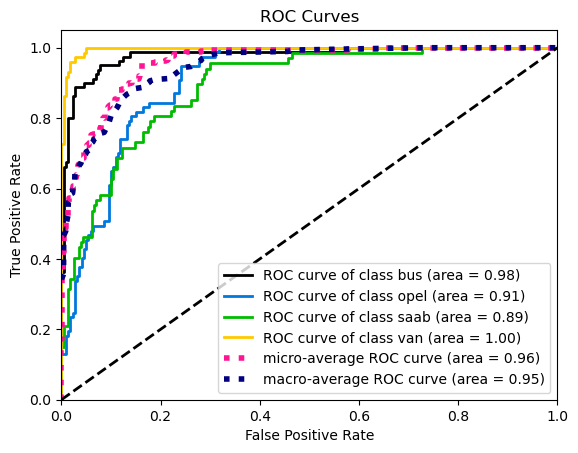

In [12]:
import scikitplot
import matplotlib.pyplot as plt


y_proba = model.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, y_proba)
plt.show()

Точность 0.82 и диапазон f1 score приемлемы для такого малого набора данных, однако, показатели модели можно улучшить при помощи Grid Search, который автоматически подбирает оптимальные гиперпараметры алгоритмической модели.

Для этого создается словарь, и метод GridSearchCV по нему подбирает параметры. Обычно словарь диапазонов составляется вручную, и сам словарь подразумевает глубокое понимание каждого из параметров. Однако в рамках выполнения лабораторной работы было принято решение взять готовый словарь диапазонов гиперпараметров.

Так как скорость работы перебора достаточно медленна, перебор осуществлен на урезанном признаковом словаре.

In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV


def build_model_lr() -> object:
    return LogisticRegression(multi_class='multinomial',
                              solver='saga',
                              tol=1e-3,
                              max_iter=500
                              )


def build_grid_search(parameters: dict, model: object,
                      scoring: str = 'f1_weighted') -> object:
    return GridSearchCV(estimator=model,
                        param_grid=parameters,
                        scoring=scoring, # Подбор по указанной метрике.
                        n_jobs=1)        # Псевдо-многопоток.


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning) # Сокрытие warning`ов.

    # Полный словарь.
    # param_grid = {
    #     'C': np.logspace(-4, 4, 20),  # Перебор значений C (регуляризации) от 10^-4 до 10^4 в 20 значений.
    #     'solver': ['liblinear', 'lbfgs', 'saga'],  # Перебор solver`oв.
    #     'penalty': ['l1', 'l2', 'elasticnet'],  # Перебор регуляризаторов.
    #     'tol': np.logspace(-4, -1, 10),  # Допуск для остановки: от 10^-4 до 10^-1
    #     'max_iter': [100, 200, 500, 1000]  # Перебор пороговых итераций.
    # }

    param_grid = {
        'C': np.logspace(-4, 4, 20),  # Перебор значений C (регуляризации) от 10^-4 до 10^4 в 20 значений.
        'penalty': ['l1', 'l2']  # Перебор регуляризаторов.
    }

    start_train_time = time.time()

    grid_search = build_grid_search(
        parameters=param_grid,
        model=build_model_lr()
    )

    grid_search.fit(X_train_scaled, y_train)
    print(f'Best parameters: {grid_search.best_params_}')

    best_lr = grid_search.best_estimator_
    best_param = best_lr.get_params()
    dt_c_score = best_param['C']
    dt_penalty = best_param['penalty']
    y_pred = best_lr.predict(X_test_scaled)

    end_train_time = time.time()
    print(f'Exp. time: {end_train_time - start_train_time}\n')

    print(classification_report(y_test, y_pred))

Best parameters: {'C': 29.763514416313132, 'penalty': 'l2'}
Exp. time: 9.376628637313843

              precision    recall  f1-score   support

         bus       0.86      0.90      0.88        80
        opel       0.72      0.55      0.62        77
        saab       0.55      0.70      0.62        67
         van       0.96      0.92      0.94        73

    accuracy                           0.77       297
   macro avg       0.77      0.77      0.76       297
weighted avg       0.78      0.77      0.77       297



#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

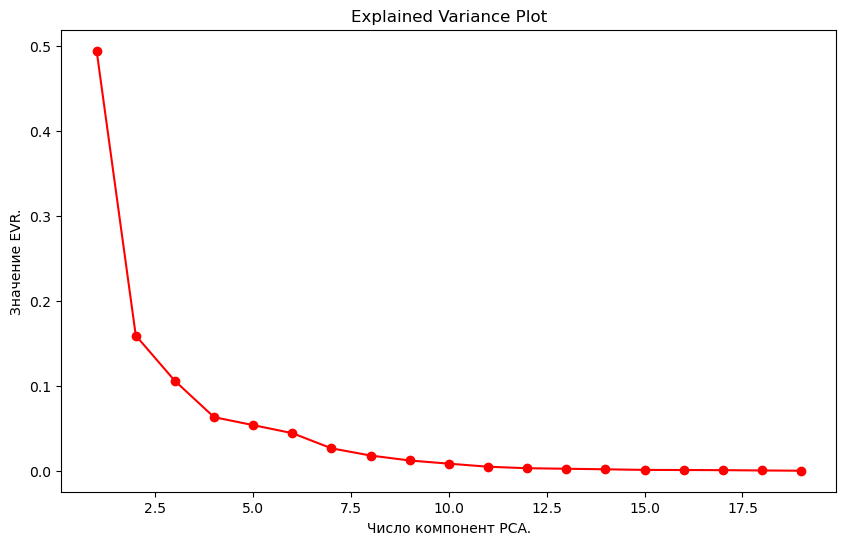

In [14]:
from sklearn.decomposition import PCA


def build_plot(evr: np.ndarray) -> None:
    x = range(1, len(evr) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(x,
             evr,
             marker='o',
             linestyle='-',
             color='red'
             )

    plt.xlabel('Число компонент PCA.')
    plt.ylabel('Значение EVR.')
    plt.title('Explained Variance Plot')
    plt.show()


def build_decomp_pca() -> object:
    return PCA()


decomp = build_decomp_pca()
decomp.fit(X_train_scaled, y_train)
build_plot(decomp.explained_variance_ratio_)


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

X_train_scaled & X_test_scaled уже нормированы в [8]. Компоненты PCA крайне чувствительны к разбросу значений.

Из предыдущей модели автоматически получаем то число компонент, которое покрывает минимум 95% дисперсии.

In [15]:
target_disp = 0.95
searched_components_num = np.argmax(np.cumsum(decomp.explained_variance_ratio_) >= target_disp) + 1
print(f'{searched_components_num} - target components number.')

8 - target components number.


Объяснение:

- Кумулятивная сумма - по накопительной сумме объяснения рассчитываем прирост объяснимости между каждой компонентой.
- Оптимальное число - ищем индекс, где сумма превышает 95%. Для починки индексации прибавляем +1.


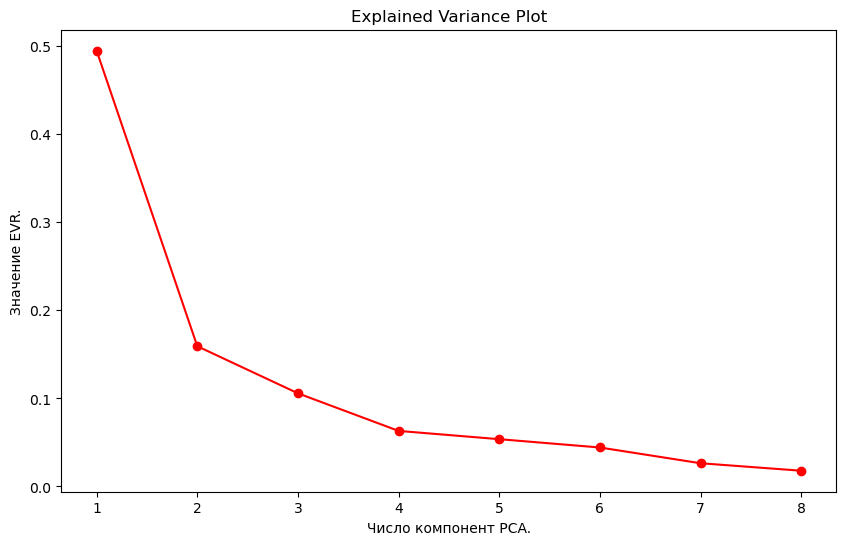

In [16]:
decomp = PCA(n_components=searched_components_num)
X_train_decomp = decomp.fit_transform(X_train_scaled)
X_test_decomp = decomp.transform(X_test_scaled)
build_plot(decomp.explained_variance_ratio_)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    start_train_time = time.time()
    
    param_grid['max_iter'] = [100, 200, 500, 1000]

    grid_search = build_grid_search(
        parameters=param_grid,
        model=build_model_lr(),
        scoring='accuracy'
    )

    grid_search.fit(X_train_decomp, y_train)
    print(f'Best parameters: {grid_search.best_params_}')

    best_lr = grid_search.best_estimator_
    y_pred = best_lr.predict(X_test_decomp)

    end_train_time = time.time()
    print(f'Exp. time: {end_train_time - start_train_time}\n')

    print(classification_report(y_test, y_pred))

Best parameters: {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2'}
Exp. time: 6.080260992050171

              precision    recall  f1-score   support

         bus       0.64      0.81      0.71        80
        opel       0.38      0.19      0.26        77
        saab       0.44      0.52      0.48        67
         van       0.88      0.90      0.89        73

    accuracy                           0.61       297
   macro avg       0.58      0.61      0.58       297
weighted avg       0.58      0.61      0.59       297



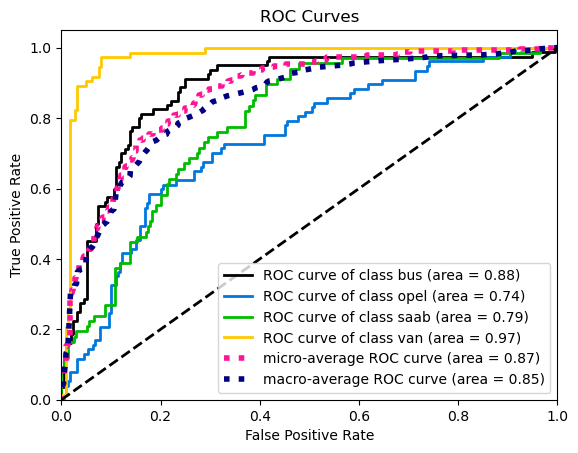

In [18]:
y_proba = best_lr.predict_proba(X_test_decomp)
scikitplot.metrics.plot_roc(y_test, y_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': range(1, 40)
}

grid_search_dt = build_grid_search(
    parameters=param_grid_dt,
    model=DT,
    scoring='accuracy'
)

grid_search_dt.fit(X_train_decomp, y_train)

print(f'Best parameters: {grid_search_dt.best_params_}')

best_dt = grid_search_dt.best_estimator_
best_param = best_dt.get_params()
dt_max_depth = best_param['max_depth']
y_pred_dt = grid_search_dt.predict(X_test_decomp)

end_train_time = time.time()
print(f'Exp. time: {end_train_time - start_train_time}\n')

print(classification_report(y_test, y_pred_dt))

Best parameters: {'max_depth': 4}
Exp. time: 6.883785963058472

              precision    recall  f1-score   support

         bus       0.74      0.75      0.75        80
        opel       0.80      0.21      0.33        77
        saab       0.39      0.87      0.54        67
         van       0.82      0.55      0.66        73

    accuracy                           0.59       297
   macro avg       0.69      0.59      0.57       297
weighted avg       0.70      0.59      0.57       297



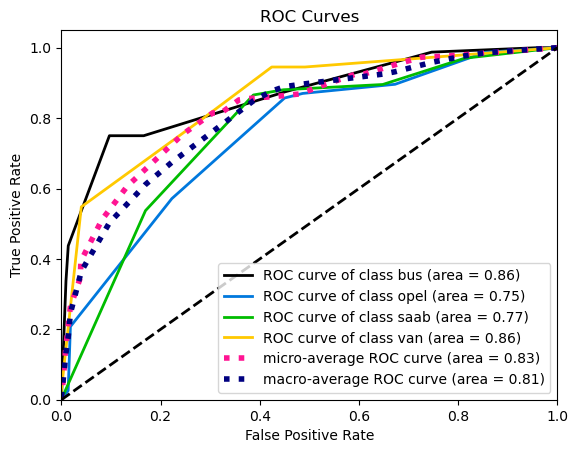

In [20]:
y_proba_dt = best_dt.predict_proba(X_test_decomp)
scikitplot.metrics.plot_roc(y_test, y_proba_dt)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

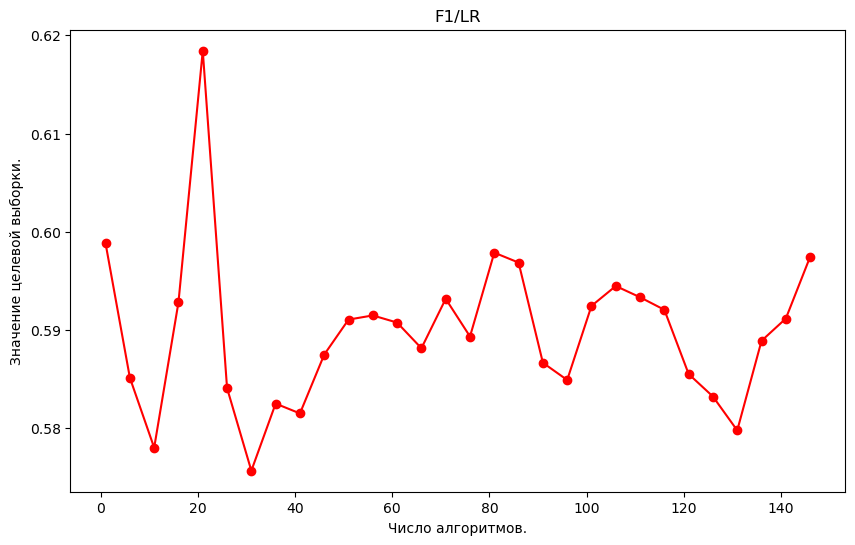

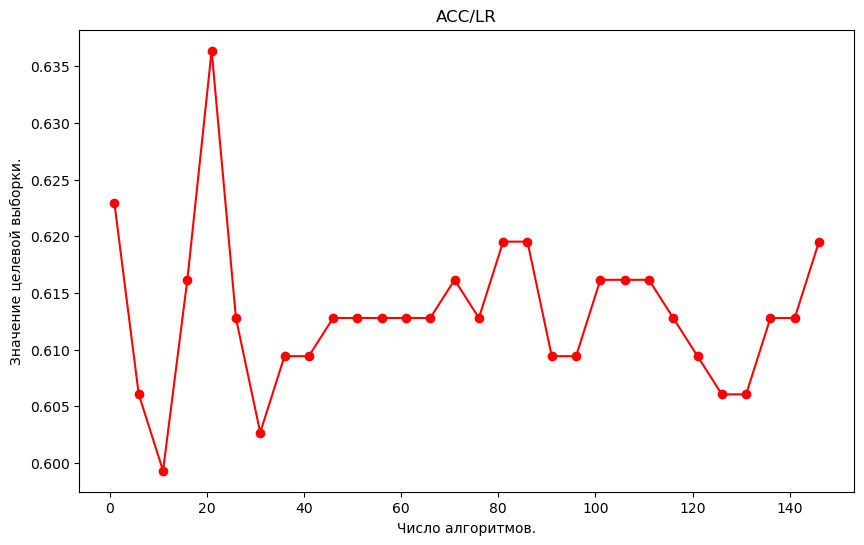

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score


def plotter(header: str,
            x: list,
            y: list) -> None:
    plt.figure(figsize=(10, 6))

    plt.plot(x,
             y,
             marker='o',
             linestyle='-',
             color='red'
             )

    plt.xlabel('Число алгоритмов.')
    plt.ylabel('Значение целевой выборки.')
    plt.title(header)
    plt.show()


e_size = range(1, 151, 5)

f1 = []
acc = []

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    for number_of_estimators_LR in e_size:
        LR_bagging = BaggingClassifier(estimator=best_lr,
                                       n_estimators=number_of_estimators_LR,
                                       bootstrap=True
                                       )
        LR_bagging.fit(X_train_decomp, y_train)
        y_pred_LR_bagging = LR_bagging.predict(X_test_decomp)
        acc.append(accuracy_score(y_test, y_pred_LR_bagging))    
        f1.append(f1_score(y_test, y_pred_LR_bagging, average='weighted'))    

plotter(x=e_size, y=f1,
        header= 'F1/LR')
plotter(x=e_size, y=acc,
        header= 'ACC/LR')

f1.clear()
acc.clear()

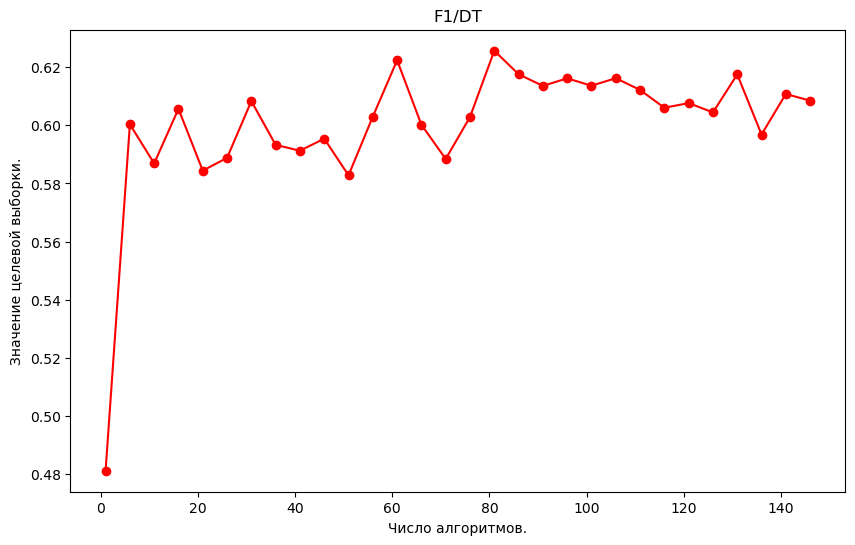

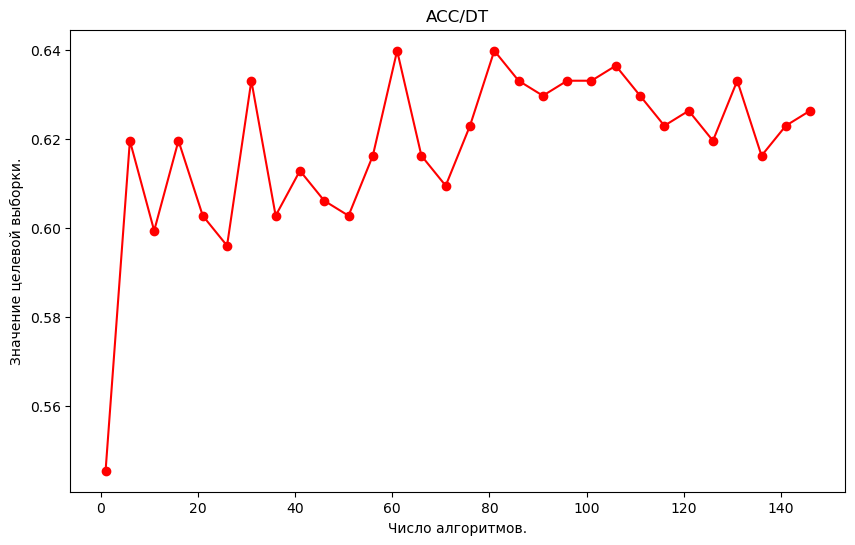

In [22]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    for number_of_estimators_DT in e_size:
        DT_bagging = BaggingClassifier(estimator=best_dt,
                                       n_estimators=number_of_estimators_DT,
                                       bootstrap=True
                                       )
        DT_bagging.fit(X_train_decomp, y_train)
        y_pred_DT_bagging = DT_bagging.predict(X_test_decomp)
        acc.append(accuracy_score(y_test, y_pred_DT_bagging))    
        f1.append(f1_score(y_test, y_pred_DT_bagging, average='weighted'))    

plotter(x=e_size, y=f1,
        header= 'F1/DT')
plotter(x=e_size, y=acc,
        header= 'ACC/DT')

f1.clear()
acc.clear()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Ищем лучшую, зависящую от n_estimator RF модель.

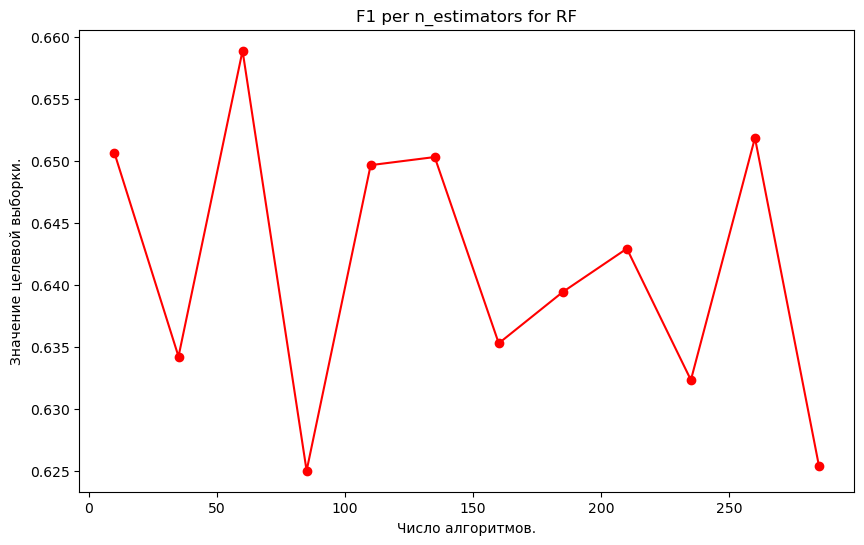

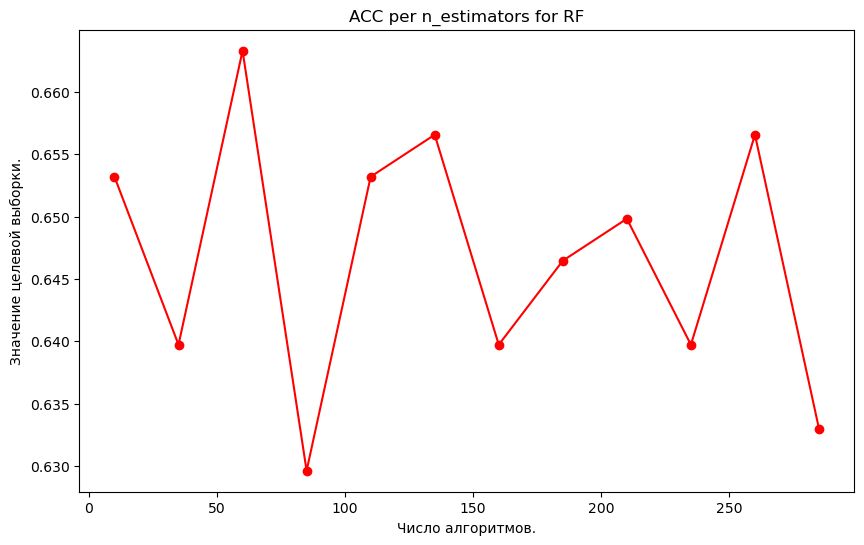

In [23]:
from sklearn.ensemble import RandomForestClassifier

est_loop = range(10, 301, 25)

for i in est_loop:
    RF = RandomForestClassifier(n_estimators=i)
    RF.fit(X_train_decomp, y_train)
    y_pred_rf = RF.predict(X_test_decomp)
    acc.append(accuracy_score(y_test, y_pred_rf))    
    f1.append(f1_score(y_test, y_pred_rf, average='weighted'))   


plotter(x=est_loop, y=f1,
        header= 'F1 per n_estimators for RF')
plotter(x=est_loop, y=acc,
        header= 'ACC per n_estimators for RF')

In [24]:
max_acc_idx = acc.index(max(acc))
max_n_ext = est_loop[max_acc_idx]
best_rf = RandomForestClassifier(n_estimators=max_n_ext)
best_rf.fit(X_train_decomp, y_train)
y_pred_rf = RF.predict(X_test_decomp)
print(classification_report(y_test, y_pred_rf))
print(f'Best est. number: {max_n_ext}')

f1.clear()
acc.clear()

              precision    recall  f1-score   support

         bus       0.79      0.89      0.84        80
        opel       0.45      0.30      0.36        77
        saab       0.42      0.57      0.48        67
         van       0.85      0.77      0.81        73

    accuracy                           0.63       297
   macro avg       0.63      0.63      0.62       297
weighted avg       0.63      0.63      0.63       297

Best est. number: 60


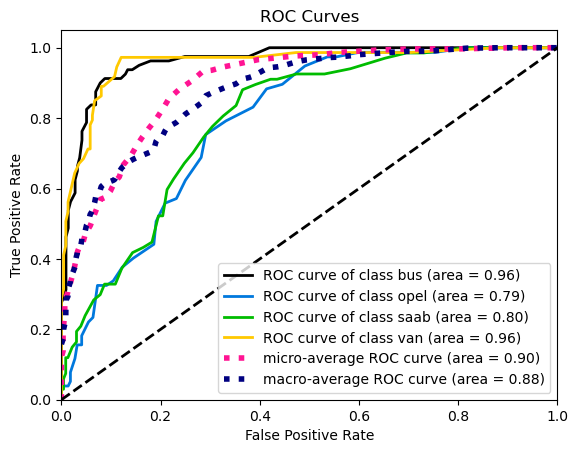

In [25]:
y_proba_rf = best_rf.predict_proba(X_test_decomp)
scikitplot.metrics.plot_roc(y_test, y_proba_rf)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [26]:
lc_best_dt = DecisionTreeClassifier(max_depth=dt_max_depth)
lc_best_rf = RandomForestClassifier(n_estimators=max_n_ext)
lc_best_lr = LogisticRegression(multi_class='multinomial',
                                solver='saga',
                                tol=1e-3,
                                max_iter=500,
                                C=dt_c_score,
                                penalty=dt_penalty
                                )

lc_best_classifiers_pool = [lc_best_dt, lc_best_lr, lc_best_rf]

Сплит данных, создание цикла.

In [27]:
from sklearn.model_selection import KFold


values = {
    "dt": {
        "f1": [],
        "acc": []
    },
    "rf": {
        "f1": [],
        "acc": []
    },
    "lr": {
        "f1": [],
        "acc": []
    },
    "train_dataset_size": range(1, 11)
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
X_accumulated = np.array([]).reshape(0, X_train_decomp.shape[1])
y_accumulated = np.array([])

batch_size = 1
for i, (train_index, _) in enumerate(kf.split(X_train_decomp)):
    X_part = X_train_decomp[train_index]
    y_part = y_train[train_index]
    
    X_accumulated = np.concatenate((X_accumulated, X_part), axis=0)
    y_accumulated = np.concatenate((y_accumulated, y_part), axis=0)
    
    model_idx = 0
    for models in lc_best_classifiers_pool:
        models.fit(X_accumulated, y_accumulated)
        y_pred = models.predict(X_test_decomp)
        accuracy_lc = accuracy_score(y_test, y_pred)    
        f1_lc = f1_score(y_test, y_pred, average='weighted')

        if model_idx == 0:
            model_key = "dt"

        if model_idx == 1:
            model_key = "lr"
        
        if model_idx == 2:
            model_key = "rf"
        
        values[model_key]["f1"].append(f1_lc)
        values[model_key]["acc"].append(accuracy_lc)

        model_idx += 1
         

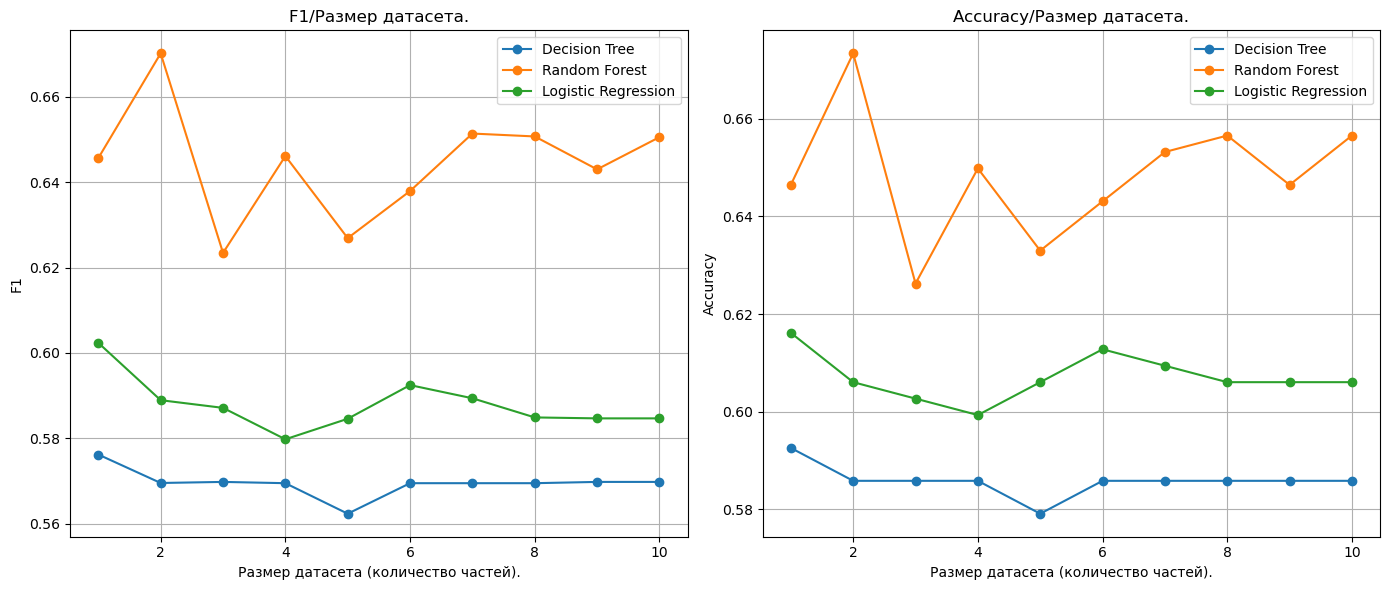

In [28]:
x = values["train_dataset_size"]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x, values["dt"]["f1"], marker='o', label='Decision Tree')
plt.plot(x, values["rf"]["f1"], marker='o', label='Random Forest')
plt.plot(x, values["lr"]["f1"], marker='o', label='Logistic Regression')
plt.xlabel('Размер датасета (количество частей).')
plt.ylabel('F1')
plt.title('F1/Размер датасета.')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, values["dt"]["acc"], marker='o', label='Decision Tree')
plt.plot(x, values["rf"]["acc"], marker='o', label='Random Forest')
plt.plot(x, values["lr"]["acc"], marker='o', label='Logistic Regression')
plt.xlabel('Размер датасета (количество частей).')
plt.ylabel('Accuracy')
plt.title('Accuracy/Размер датасета.')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [29]:
import xgboost as xgb


y_train = y_train.astype(str)
y_train = pd.factorize(y_train)[0]

y_test = y_test.astype(str)
y_test = pd.factorize(y_test)[0]

num_classes = len(np.unique(y_train))

params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 3,
    'num_class': num_classes
}


dtrain = xgb.DMatrix(X_train_decomp, label=y_train)
dtest = xgb.DMatrix(X_test_decomp, label=y_test)

cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500, # Максимально проверяемое количество деревьев
    nfold=5,
    early_stopping_rounds=10,
    metrics="mlogloss",
    seed=42
)

optimal_trees = len(cv_results)
print(f"optimal_trees: {optimal_trees}")

model = xgb.train(params, dtrain, num_boost_round=optimal_trees)

y_pred = model.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"accuracy: {accuracy}")
print(f"f1: {f1}")


optimal_trees: 81
accuracy: 0.3400673400673401
f1: 0.36294216388693135
